<a href="https://colab.research.google.com/github/VindaShinde/DonorBrain/blob/master/Chat_challenge_Vinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import re
import csv
import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# read each file and read each entry 'chat' (time, commentor, comments)
item = []
with open('GMT20210915-010624_Recording.txt','r',encoding='utf-8') as myFile:
  to_csv = csv.reader(myFile)
  for row in to_csv:
    item.append(row[0])
  print(len(item))

with open('GMT20210825-010701_Recording.txt','r',encoding='utf8') as myFile2:
  to_csv = csv.reader(myFile2)
  for row in to_csv:
    item.append(row[0])
  print(len(item))
print(item[0])

125
259
00:12:58	Ajna A Rivera:	Congratulations!


In [33]:
# Get the times in a list
times = []
t = re.compile('[0-9]+:[0-9]+:[0-9]+')
for i in item:
  time = re.findall(t,i)
  time = datetime.datetime.strptime(time[0], '%H:%M:%S')
  times.append(time)
print(times[0])

1900-01-01 00:12:58


In [41]:
# Get the commentors in a list
commentors = []
c = re.compile('\t[a-zA-Z ()-]+')
for i in item:
  commentor = re.findall(c,i)
  commentor = re.sub('\t','',commentor[0])
  commentors.append(commentor)
print(commentors)  

['Ajna A Rivera', 'Cristel Irwin', 'Rohan Suryaneni', 'Adam Joseph Epstein', 'Tsun', 'Vinda', 'Akhilesh Nagaraj', 'Tejaswani Yadav', 'Sarthak (Satty) Pratap Singh', 'Wei (Ritta) Zhu', 'Amitabh Singh Virk', 'Adam Joseph Epstein', 'Ajna A Rivera', 'Amitabh Singh Virk', 'Adam Joseph Epstein', 'Tsun', 'Ash Chetty', 'Ajna A Rivera', 'Vinda', 'Ruiqi Yang (Nancy)', 'Adam Joseph Epstein', 'Tsun', 'Akhilesh Nagaraj', 'Akshat Deven Shah', 'Sarthak (Satty) Pratap Singh', 'Nimit Shah', 'Zishan Zeng', 'Denise Carneiro', 'Heena Kuhati', 'Nan Zhao', 'Tejaswani Yadav', 'Yu-Jung Yen', 'Merryanna', 'Po-Chen Su', 'Pei-Ying Yu', 'Nomondalai Batjargal', 'Ryan J Wang', 'Wei (Ritta) Zhu', 'Amitabh Singh Virk', 'Shahid Hussain', 'Nazim Hassan Rizvi', 'Rohan Suryaneni', 'Vinda', 'Shahid Hussain', 'Chuang Niu(Stan)', 'Sarthak (Satty) Pratap Singh', 'Adam Joseph Epstein', 'Chuang Niu(Stan)', 'Nimit Shah', 'Ajna A Rivera', 'Zishan Zeng', 'Vinda', 'Akshat Deven Shah', 'Sarthak (Satty) Pratap Singh', 'Chuang Niu(St

In [38]:
# Get the comments in a list
comments = []
co = re.compile(':\t.+')
for i in item:
  comment = re.findall(co,i)
  comment = re.sub(':\t','',comment[0])
  comments.append(comment)
print(comments[0])

Congratulations!


In [40]:
from enum import unique
# Get list of length of comments
length_of_comment = []
for comment in comments:
  length_of_comment.append(len(comment))
print(length_of_comment)

[16, 18, 13, 14, 15, 1, 13, 8, 36, 10, 14, 8, 13, 13, 13, 13, 2, 1, 2, 3, 3, 2, 1, 1, 1, 3, 2, 1, 1, 2, 5, 1, 1, 2, 1, 2, 1, 2, 1, 74, 2, 1, 13, 12, 36, 18, 13, 11, 22, 33, 18, 20, 19, 22, 10, 28, 22, 23, 22, 19, 23, 11, 33, 17, 19, 20, 45, 29, 2, 2, 3, 2, 2, 2, 3, 3, 2, 4, 2, 2, 2, 4, 2, 4, 3, 17, 19, 17, 6, 4, 2, 5, 4, 7, 24, 4, 23, 3, 7, 15, 2, 3, 3, 3, 4, 4, 3, 4, 9, 15, 3, 4, 1, 3, 1, 1, 1, 19, 24, 17, 23, 12, 13, 13, 72, 4, 60, 3, 3, 3, 8, 12, 4, 3, 8, 4, 10, 3, 12, 3, 3, 4, 3, 22, 10, 3, 20, 10, 8, 2, 10, 8, 26, 1, 8, 17, 4, 4, 3, 4, 3, 4, 4, 4, 5, 3, 3, 3, 4, 5, 5, 5, 4, 3, 3, 3, 3, 20, 16, 32, 12, 22, 3, 12, 5, 68, 7, 16, 21, 15, 15, 13, 16, 12, 33, 54, 11, 38, 4, 28, 9, 21, 9, 9, 4, 4, 8, 10, 10, 8, 22, 21, 4, 3, 3, 5, 3, 3, 3, 3, 3, 3, 4, 7, 5, 4, 4, 31, 18, 10, 4, 3, 18, 3, 12, 4, 3, 4, 3, 12, 12, 3, 10, 14, 14, 7, 9, 21, 13, 41, 3, 3, 18, 42, 41, 58, 16, 52, 51]


In [49]:
# Lets point the comments and add 10 points for each comment to every commentor
scores = []
unique_commentor_set = set(commentors)
unique_commentor = list(unique_commentor_set)
for i in range(len(unique_commentor)):
  score = 0
  for j in range(len(commentors)):
    if unique_commentor[i] == commentors[j]:
      score += len(comments[j]) + 10
  scores.append(score)

print(scores)

  

[52, 110, 103, 14, 160, 101, 625, 194, 24, 135, 141, 301, 73, 13, 172, 28, 72, 60, 40, 45, 24, 66, 142, 163, 147, 179, 155, 424, 14, 50, 239, 26, 53, 61, 36, 138, 232, 26, 244, 18, 26, 109, 76, 185, 129, 28, 67, 14]


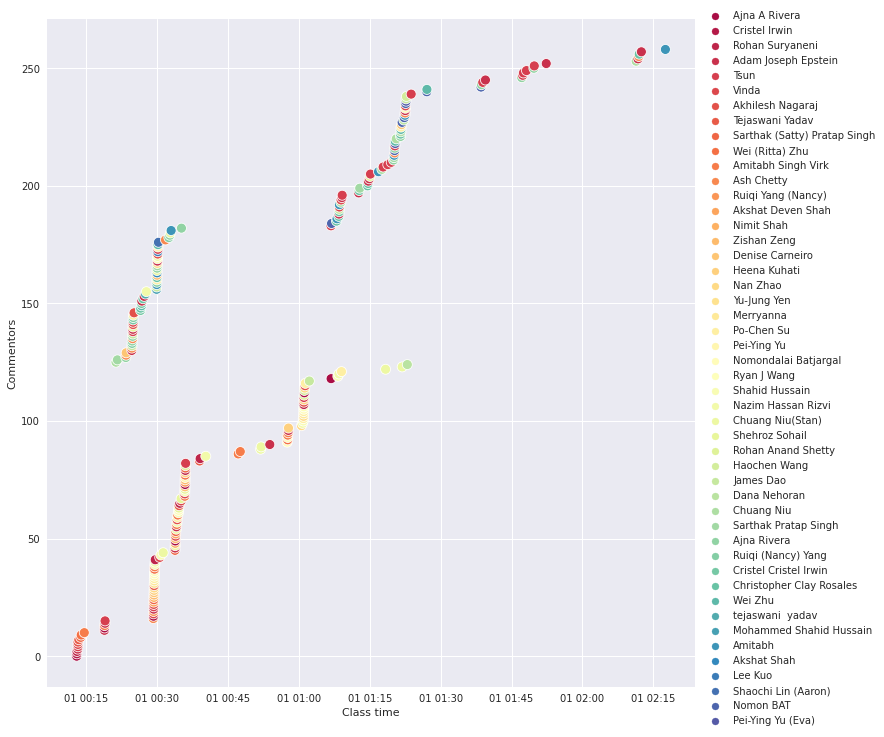

In [59]:
plt.style.use('seaborn')
sns.set_style('darkgrid')
dates = times
ax = sns.relplot(x=times, y=range(len(times)), hue = commentors, palette='Spectral',height=10,s=100)
ax.set(xlabel='Class time',ylabel='Commentors')
plt.show()

Text(0, 0.5, 'Number of comments')

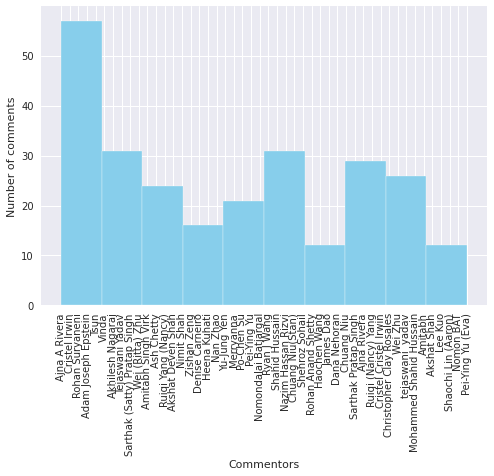

In [66]:
plt.hist(commentors,color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Commentors')
plt.ylabel('Number of comments')

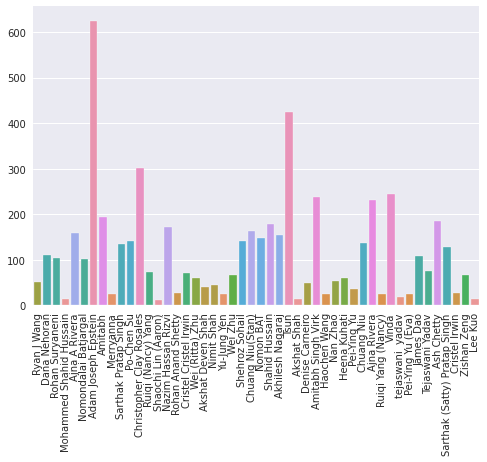

In [70]:
plt.style.use('seaborn')
sns.set_style('darkgrid')
ax = sns.barplot(x=unique_commentor,y=scores,hue=scores,dodge=False)
plt.xticks(rotation=90)
ax.legend_.remove()
plt.show()